In [1]:
# """
# import os
# import shutil
# #Poner los archivos de airways en la carpeta para que los lea todos y los reordene
# dir = "/home/alan/workspaces/Skeleton/Data/Airways"
# #dir2 = "/home/alan/wk_old/pib/BaseData/Airways"

# with os.scandir(dir) as paths:
#     for path in paths:
#         print(f"Procesando: {path.name}")
#         # Crea una carpeta por cada archivo nifti
#         nombre_carpeta = path.name[:-7] if path.name.endswith('.nii.gz') and path.is_file() else path.name
#         ruta_carpeta = os.path.join(dir, nombre_carpeta)
#         # Mover el archivo a su carpeta
#         os.mkdir(ruta_carpeta)
#         shutil.move(path.path, ruta_carpeta)
#         #print(f" Movido {path.name} a {ruta_carpeta}")
        
        
# """            

In [2]:
# import pandas as pd
# import numpy as np
# import os

# # Definir ubicacion y nombre de archivos
# path = "a:/main/workspaces/procesado_datos/"
# csv_conteos = "conteos_ramas.csv"
# csv_aux = "conteos_ramas_007.csv"

# Lectura
# df = pd.read_csv(os.path.join(path, csv_conteos)) 
# df7 = pd.read_csv(os.path.join(path, csv_aux))

# # Agregar columnas faltantes
# df7['Gen_13'] = 0

# # Definir el orden correcto de las columnas (asumiendo que 'Gen_13' existe)
# columnas_ordenadas = (
#     ['Paciente', 'Total Ramas'] +  # Columnas fijas al inicio
#     [f'Gen_{i}' for i in range(14)]  # Genera ['Gen_0', 'Gen_1', ..., 'Gen_13']
# )

# # Filtrar solo las columnas que existen en el DataFrame
# columnas_finales = [col for col in columnas_ordenadas if col in df.columns]

# # Reordenar el DataFrame
# df = df[columnas_finales]
# df7 = df7[columnas_finales]
# index_7 = df[df['Paciente'] == 'ATM_007_0000'].index
# df.loc[index_7] = df7.iloc[0].values
# columnas_numericas = df.select_dtypes(include=["float64"]).columns
# df[columnas_numericas] = df[columnas_numericas].fillna(0).astype(int)
# df.to_csv('conteo_arr.csv', index=False)
# #Guardar cambios
# len(df.columns)



In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Definir ubicacion y nombre de archivos
path = "a:/main/workspaces/procesado_datos/"
csv_manual = "conteo_arreglado.csv"
csv_auto = "conteo_metodo_automatico.csv"

df_m = pd.read_csv(os.path.join(path, csv_manual), sep=';') 
df_a = pd.read_csv(os.path.join(path, csv_auto), sep=',') 

df_m["Total Ramas"] = df_m.select_dtypes(include="number").sum(axis=1)
df_a["Total Ramas"] = df_a.select_dtypes(include="number").sum(axis=1)


In [12]:
stats = df_m[df_m.select_dtypes(include=["int64"]).columns].agg(['mean','std','min', 'max' ]).round()
stats

,Gen_0,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,Gen_11,Gen_12,Gen_13,Total Ramas
mean,1.0,2.0,4.0,9.0,19.0,35.0,45.0,35.0,21.0,14.0,7.0,3.0,1.0,0.0,197.0
std,0.0,0.0,0.0,1.0,2.0,5.0,13.0,15.0,11.0,8.0,5.0,3.0,1.0,1.0,52.0
min,1.0,2.0,4.0,6.0,13.0,20.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
max,1.0,2.0,5.0,10.0,21.0,41.0,65.0,70.0,47.0,30.0,17.0,12.0,4.0,4.0,294.0


In [5]:
stats = df_a[df_a.select_dtypes(include=["int64"]).columns].agg(['mean','std','min', 'max' ]).round()
stats

,Gen_0,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,Gen_11,Gen_12,Gen_13,Total Ramas
mean,1.0,2.0,4.0,9.0,16.0,14.0,7.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,62.0
std,0.0,0.0,0.0,1.0,3.0,6.0,5.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,19.0
min,1.0,2.0,4.0,7.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
max,1.0,2.0,5.0,11.0,20.0,25.0,20.0,11.0,8.0,5.0,5.0,4.0,4.0,3.0,115.0


In [6]:

# Derretir (melt) las columnas de generaciones
df_melted1 = df_m.melt(
    value_vars=[col for col in df_m.columns if col.startswith('Gen_')],
    var_name='Generación',
    value_name='Conteo'
)
df_melted1['Generación'] = df_melted1['Generación'].str.replace('Gen_', '').astype(int)  # Convertir a número
df_melted1

# Derretir (melt) las columnas de generaciones
df_melted2 = df_a.melt(
    value_vars=[col for col in df_a.columns if col.startswith('Gen_')],
    var_name='Generación',
    value_name='Conteo'
)
df_melted2['Generación'] = df_melted2['Generación'].str.replace('Gen_', '').astype(int)  # Convertir a número

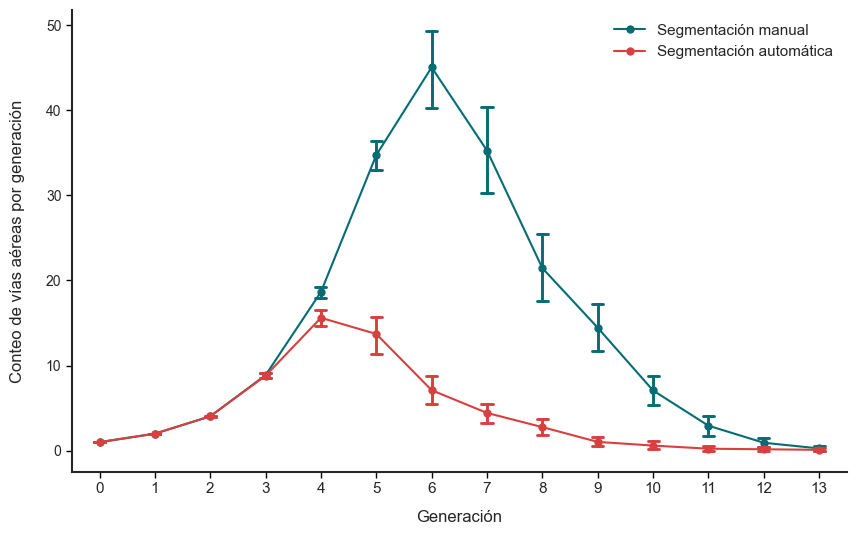

In [44]:
sns.set_style("white")

plt.figure(figsize=(10, 6))
ax = sns.pointplot(
    data=df_melted1,
    x='Generación',
    y='Conteo',
    errorbar='ci',  # Intervalo de confianza del 95%
    capsize=0.2,
    color="#056C74",  # Color principal (rojo coral)
    err_kws={"color": "#056C74", "linewidth": 2.1},  # Color del intervalo 
    linewidth=1.5,      # Grosor de la línea principal (default: 1.5)
    markersize=5,     # Tamaño de los puntos (default: 8)
    markeredgewidth=1, # Grosor del borde de los puntos
    label = "Segmentación manual"
    )
# Gráfico 2 - df_melted2
sns.pointplot(
    data=df_melted2,
    x='Generación',
    y='Conteo',
    errorbar='ci',
    capsize=0.2,
    color="#D93F3F",  # Color diferente para distinguir
    err_kws={"color": "#D93F3F", "linewidth": 2.1},
    linewidth=1.5,
    markersize=5,
    markeredgewidth=1,
    label = "Segmentación automática"
    #ax=axes[1]  # Asignar al segundo subplot
)
# Remover bordes del gráfico
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)

# Personalizar ejes y títulos

plt.xlabel("Generación", fontsize=12, labelpad=10)
plt.ylabel("Conteo de vías aéreas por generación", fontsize=12, labelpad=15)

# Ajustar ticks y grid
plt.xticks(range(0, 14),fontsize=11)  # Fijar ticks de 0 a 13

# Habilitar ticks menores (líneas pequeñas)
ax.tick_params(
    axis="both",           # Eje X
    which="both",       # Aplica a ticks mayores y menores
    bottom=True,        # Mostrar ticks en la parte inferior
    left=True,
    length=4,          # Longitud de los ticks
    width=1,           # Grosor
    color="black",   # Color de las líneas
    direction='out'
)
# Leyenda personalizada
plt.legend(
    #title="Tipo de Método",  # Título de la leyenda
    #title_fontsize=12,
    fontsize=11,
    frameon=False,  # Sin marco
    loc='best'  # Posición automática (puedes usar 'upper right', 'lower left', etc.)
)
#ax.grid(axis="x", linestyle="--", alpha=0.3)#Añadir grid solo en eje X para mayor claridad
plt.savefig('images/pointplot first 30 patients')
plt.show()

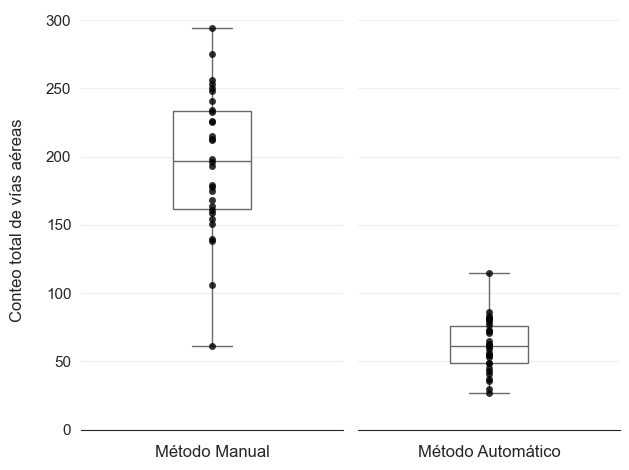

In [43]:
fig, ax = plt.subplots(1, 2,sharey=1)

# Primer gráfico (izquierda)
sns.boxplot(
    data=df_m,
    y="Total Ramas",
    color="#72E3EB",
    width=0.3,
    showcaps=True,
    boxprops={'facecolor':'white'},
    ax=ax[0]  # Especificar el eje correctamente
)

sns.stripplot(
    y="Total Ramas", 
    data=df_m,
    jitter=False, 
    marker='o', 
    alpha=0.8,
    color='black',
    ax=ax[0]  # Usar el mismo eje
)

# Segundo gráfico (derecha)
sns.boxplot(
    data=df_a,
    y="Total Ramas",
    color="#72E3EB",
    width=0.3,
    showcaps=True,
    boxprops={'facecolor':'white'},
    ax=ax[1]  # Especificar el eje correctamente
)

sns.stripplot(
    y="Total Ramas", 
    data=df_a,
    jitter=False, 
    marker='o', 
    alpha=0.8,
    color='black',
    ax=ax[1]  # Usar el mismo eje
)

# Personalización
ax[0].set_ylabel("Conteo total de vías aéreas", fontsize=12, labelpad=15)
ax[0].set_xlabel("Método Manual", fontsize=12)
ax[1].set_xlabel("Método Automático", fontsize=12)
ax[1].set_ylabel("")  # Eliminar etiqueta duplicada

# Configuraciones compartidas
for a in ax:
    sns.despine(left=True, ax=a)  # Quitar bordes
    a.grid(axis="y", alpha=0.3)   # Grid horizontal
    a.set_yticks(range(0, 301, 50))
    a.set_yticklabels(range(0, 301, 50), fontsize=11)

# Ajustar espacios entre gráficos
#plt.suptitle("TAC 30 Pacientes")
plt.tight_layout()

plt.savefig('images/boxplot manual vs auto')
plt.show()